In [2]:
import scipy.integrate as intode
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import time
import scipy.optimize as opt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import pandas as pd


In [140]:
solvemethod='Radau'
problem=2




In [12]:

plt.rcParams['font.sans-serif'] = ['STSong']
plt.rcParams['axes.unicode_minus'] = False

In [141]:
k=80000
r=1025*9.8*np.pi
mv=2433
mf=4866
if(problem==1):
    ma=1335.535
    mu=656.3616
    w=1.4005
    f=6250
elif(problem==2):
    ma=1165.992
    mu=167.8395
    w=2.2143
    f=4890
    

prd=2*np.pi/w
tmax=prd*40
titv=0.2
nu1=10000
n1=0.5

In [111]:
nu1,n1=63414,0.2259

In [156]:

start=time.time()

try:
    x0=np.array([xres1[i][-1] for i in range(4)])
    x1=np.array([xres2[i][-1] for i in range(4)])
except:
    x0=np.array([0,0,0,0])
    x1=np.array([0,0,0,0])


def equ1(t,x,nu):
    xv=x[0]
    xf=x[1]
    dxv=x[2]
    dxf=x[3]
    fxv=dxv
    fxf=dxf
    fdxv=(-k*xv+k*xf-nu*(dxv-dxf))/mv
    m=mf+ma
    fdxf=(-k*xf+k*xv+nu*(dxv-dxf)-mu*dxf+f*np.cos(w*t)-r*xf)/m
    return np.array([fxv,fxf,fdxv,fdxf])

def fun1(t,x):
    return equ1(t,x,nu1)


def equ2(t,x,nu,n):
    xv=x[0]
    xf=x[1]
    dxv=x[2]
    dxf=x[3]
    fxv=dxv
    fxf=dxf
    fdxv=(-k*xv+k*xf-nu*(dxv-dxf)*(np.abs(dxv-dxf))**n)/mv
    m=mf+ma
    fdxf=(-k*xf+k*xv+nu*(dxv-dxf)*(np.abs(dxv-dxf))**n-mu*dxf+f*np.cos(w*t)-r*xf)/m
    return np.array([fxv,fxf,fdxv,fdxf])

def fun2(t,x):
    return equ2(t,x,nu1,n1)
print(x0)
print(x1)
te=np.arange(start=0,stop=tmax,step=titv)
sol1 = intode.solve_ivp(fun1,(te[0],te[-1]),x0,method=solvemethod,t_eval=te)
sol2 = intode.solve_ivp(fun2,(te[0],te[-1]),x1,method=solvemethod,t_eval=te)



end=time.time()
print(end-start)

[-0.48489063 -0.42154451 -0.18555241 -0.11896872]
[-0.49625304 -0.42404531 -0.19212595 -0.13948351]
0.13654422760009766


In [37]:
tmax

113.5019700524696

In [50]:
xres1=sol1.y
xres2=sol2.y
tres=sol1.t


In [113]:
data=pd.DataFrame(np.transpose(xres1))
writer=pd.ExcelWriter('xres1-temp.xlsx')
data.to_excel(writer,'page_1',float_format='%.5f')
writer.save()
writer.close()

In [114]:
data=pd.DataFrame(np.transpose(xres2))
writer=pd.ExcelWriter('xres2-temp.xlsx')
data.to_excel(writer,'page_1',float_format='%.5f')
writer.save()
writer.close()

In [115]:
data=pd.DataFrame(np.transpose(tres))
writer=pd.ExcelWriter('t-temp.xlsx')
data.to_excel(writer,'page_1',float_format='%.5f')
writer.save()
writer.close()

In [48]:
np.shape(xres1)

(4, 568)

In [116]:
x1vres=xres1[0]
x1fres=xres1[1]
v1vres=xres1[2]
v1fres=xres1[3]

In [117]:
x2vres=xres2[0]
x2fres=xres2[1]
v2vres=xres2[2]
v2fres=xres2[3]

Text(0, 0.5, '$\\dot x_{f}$(m/s)')

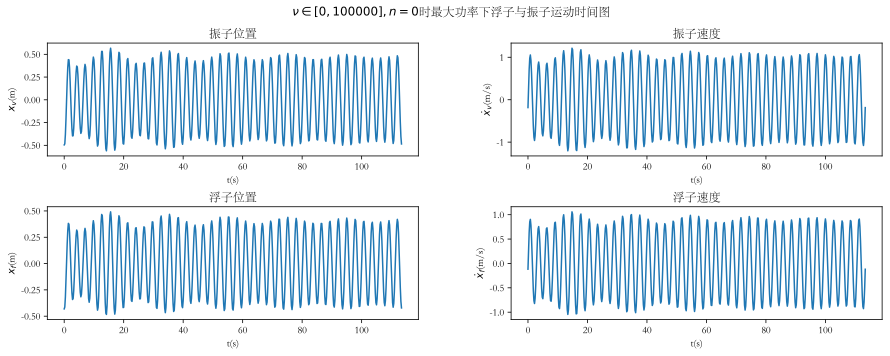

In [118]:
plt.figure(figsize=(15,5))
plt.suptitle(r'$\nu\in[0,100000],n=0$时最大功率下浮子与振子运动时间图')
plt.subplots_adjust(wspace=0.25,hspace=0.45)
plt.subplot(2,2,1)
plt.plot(tres,x1vres)
plt.title('振子位置')
plt.xlabel(r't(s)')
plt.ylabel(r'$x_{v}$(m)')
plt.subplot(2,2,2)
plt.plot(tres,v1vres)
plt.title('振子速度')
plt.xlabel(r't(s)')
plt.ylabel(r'$\dot x_{v}$(m/s)')
plt.subplot(2,2,3)
plt.plot(tres,x1fres)
plt.title('浮子位置')
plt.xlabel(r't(s)')
plt.ylabel(r'$x_{f}$(m)')
plt.subplot(2,2,4)
plt.plot(tres,v1fres)
plt.title('浮子速度')
plt.xlabel(r't(s)')
plt.ylabel(r'$\dot x_{f}$(m/s)')



Text(0, 0.5, '$\\dot x_{f}$(m/s)')

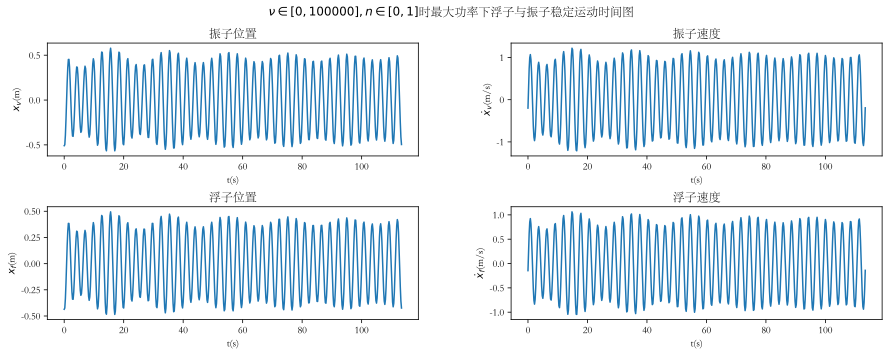

In [120]:
plt.figure(figsize=(15,5))
plt.suptitle(r'$\nu\in[0,100000],n\in[0,1]$时最大功率下浮子与振子稳定运动时间图')
plt.subplots_adjust(wspace=0.25,hspace=0.45)
plt.subplot(2,2,1)
plt.plot(tres,x2vres)
plt.title('振子位置')
plt.xlabel(r't(s)')
plt.ylabel(r'$x_{v}$(m)')
plt.subplot(2,2,2)
plt.plot(tres,v2vres)
plt.title('振子速度')
plt.xlabel(r't(s)')
plt.ylabel(r'$\dot x_{v}$(m/s)')
plt.subplot(2,2,3)
plt.plot(tres,x2fres)
plt.title('浮子位置')
plt.xlabel(r't(s)')
plt.ylabel(r'$x_{f}$(m)')
plt.subplot(2,2,4)
plt.plot(tres,v2fres)
plt.title('浮子速度')
plt.xlabel(r't(s)')
plt.ylabel(r'$\dot x_{f}$(m/s)')



In [15]:
def Dint(arr,h):
    #复合辛普森积分
    n=len(arr)
    sum=0
    if (n%2==0):
        sum+=(arr[-1]+arr[-2])*h/2
        n-=1
    tsum=arr[0]+arr[n-1]
    for i in range(1,n-1):
        if(i%2):
            tsum+=4*arr[i]
        else:
            tsum+=2*arr[i]
    sum+=tsum*h/3
    return sum

1平均功率为 126.82871208568709
2平均为 139.49422781013405


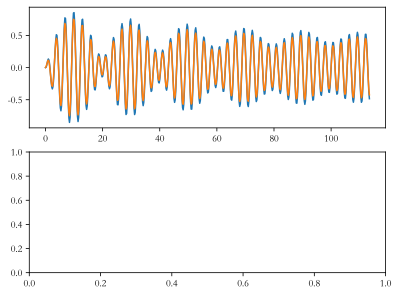

In [82]:

def draw1():
    plt.subplot(2,1,1)

    xres=sol1.y
    xv1res=xres[0]
    dxv1res=xres[2]
    xf1res=xres[1]
    dxf1res=xres[3]
    tres=sol1.t

    p1=nu1*(dxv1res-dxf1res)**2
    p1total=np.sum(p1)*titv

    print('1平均功率为',p1total/tmax)


    plt.plot(tres,xv1res)
    plt.plot(tres,xf1res)

    # plt.plot(tres,xv1res-xf1res)

    # plt.plot(tres,p1)

    plt.subplot(2,1,2)

    xres=sol2.y
    xv2res=xres[0]
    dxv2res=xres[2]
    xf2res=xres[1]
    dxf2res=xres[3]
    tres=sol2.t

    p2=nu1*(dxv2res-dxf2res)**2
    p2total=np.sum(p2)*titv

    print('2平均为',p2total/tmax)

    # plt.plot(tres,xv1res-xv2res)
    # plt.plot(tres,xf1res-xf2res)
    # plt.plot(tres,xv2res-xf2res)
    # plt.plot(tres,p1)

draw1()

In [55]:

def errequ1(value):
    value=np.abs(value)
    sol=intode.solve_ivp(lambda t,x:equ1(t,x,value),(te[0],te[-1]),x0,method=solvemethod,t_eval=te)
    xres=sol.y
    dxv1res=xres[2]
    dxf1res=xres[3]
    p1=value*(dxv1res-dxf1res)**2
    p1average=Dint(p1,titv)/tmax
    print(value,'->',p1average)
    return -p1average


In [56]:
def errequ2(nu,n):
    sol=intode.solve_ivp(lambda t,x:equ2(t,x,nu,n),(te[0],te[-1]),x0,method=solvemethod,t_eval=te)
    xres=sol.y
    dxv1res=xres[2]
    dxf1res=xres[3]
    p1=nu*(dxv1res-dxf1res)**2*np.abs(dxv1res-dxf1res)**n
    p1average=Dint(p1,titv)/tmax
    print(nu,'&&',n,'->',p1average)
    return -p1average
    

In [125]:
def calcP(nu,n,xres):
    dxv1res=xres[2]
    dxf1res=xres[3]
    p1=nu*(dxv1res-dxf1res)**2*np.abs(dxv1res-dxf1res)**n
    return Dint(p1,titv)/tmax

In [57]:



aa=np.arange(start=0,stop=100000,step=1000)
bb=[-errequ1(i) for i in aa]



0 -> 0.0
1000 -> 12.434832864376386
2000 -> 24.74720909436652
3000 -> 36.93498218803175
4000 -> 48.948692592822475
5000 -> 60.73969806006254
6000 -> 72.26625773145066
7000 -> 83.4847732880518
8000 -> 94.35852191043047
9000 -> 104.85526610550856
10000 -> 114.94401598651712
11000 -> 124.60458058281385
12000 -> 133.81535238206757
13000 -> 142.5637512191737
14000 -> 150.83752502249607
15000 -> 158.63191179409236
16000 -> 165.94251918141336
17000 -> 172.77324166025252
18000 -> 179.12986348117275
19000 -> 185.01412478612804
20000 -> 190.44263133574398
21000 -> 195.425630583794
22000 -> 199.97648586922654
23000 -> 204.11095544770876
24000 -> 207.8451987689736
25000 -> 211.19152884399884
26000 -> 214.17878080761395
27000 -> 216.81814860343877
28000 -> 219.12918717628474
29000 -> 221.13055561528418
30000 -> 222.83994210992284
31000 -> 224.27558339816173
32000 -> 225.45576796290518
33000 -> 226.39489813554937
34000 -> 227.11115775976972
35000 -> 227.62003534509972
36000 -> 227.93613875073626
370

In [58]:
aa=np.linspace(start=0,stop=100000,num=200)
cc=np.linspace(start=0,stop=1,num=100)
X,Y=np.meshgrid(aa,cc)
dd=[[-errequ2(i,j) for j in cc] for i in aa]

0.0 && 0.0 -> 0.0
0.0 && 0.010101010101010102 -> 0.0
0.0 && 0.020202020202020204 -> 0.0
0.0 && 0.030303030303030304 -> 0.0
0.0 && 0.04040404040404041 -> 0.0
0.0 && 0.05050505050505051 -> 0.0
0.0 && 0.06060606060606061 -> 0.0
0.0 && 0.07070707070707072 -> 0.0
0.0 && 0.08080808080808081 -> 0.0
0.0 && 0.09090909090909091 -> 0.0
0.0 && 0.10101010101010102 -> 0.0
0.0 && 0.11111111111111112 -> 0.0
0.0 && 0.12121212121212122 -> 0.0
0.0 && 0.13131313131313133 -> 0.0
0.0 && 0.14141414141414144 -> 0.0
0.0 && 0.15151515151515152 -> 0.0
0.0 && 0.16161616161616163 -> 0.0
0.0 && 0.17171717171717174 -> 0.0
0.0 && 0.18181818181818182 -> 0.0
0.0 && 0.19191919191919193 -> 0.0
0.0 && 0.20202020202020204 -> 0.0
0.0 && 0.21212121212121213 -> 0.0
0.0 && 0.22222222222222224 -> 0.0
0.0 && 0.23232323232323235 -> 0.0
0.0 && 0.24242424242424243 -> 0.0
0.0 && 0.25252525252525254 -> 0.0
0.0 && 0.26262626262626265 -> 0.0
0.0 && 0.27272727272727276 -> 0.0
0.0 && 0.2828282828282829 -> 0.0
0.0 && 0.29292929292929293 -

In [86]:
max(max(dd))

228.08095666997357

In [60]:
Z=np.array(dd)
Z=np.transpose(Z)

Text(0.5, 0, '功率$p(N\\cdot m/s)$')

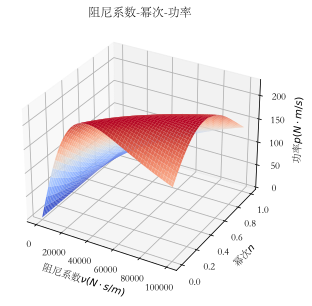

In [61]:


fig=plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z,cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.title('阻尼系数-幂次-功率')
plt.xlabel(r'阻尼系数$\nu(N\cdot s/m)$')
plt.ylabel(r'幂次$n$')
ax.set_zlabel(r'功率$p(N\cdot m/s)$')

In [96]:

fig=plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter3D(X,Y,Z)
plt.title('阻尼系数-幂次-功率')
plt.xlabel(r'阻尼系数$\nu(N\cdot s/m)$')
plt.ylabel(r'幂次$n$')
ax.set_zlabel(r'功率$p(N\cdot m/s)$')

Text(0.5, 0, '功率$p(N\\cdot m/s)$')

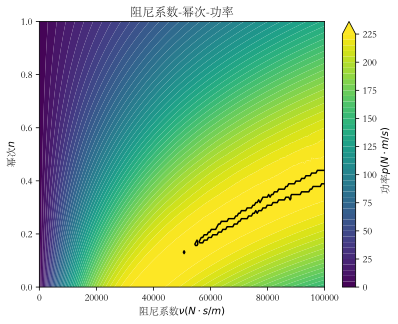

In [109]:
from cProfile import label


cs=plt.contourf(X,Y,Z,50,extend='max')

plt.title('阻尼系数-幂次-功率')
plt.xlabel(r'阻尼系数$\nu(N\cdot s/m)$')
plt.ylabel(r'幂次$n$')
plt.colorbar(cs,label=r'功率$p(N\cdot m/s)$')
plt.contour(X,Y,Z>228.2,1,colors=['None','Black'])

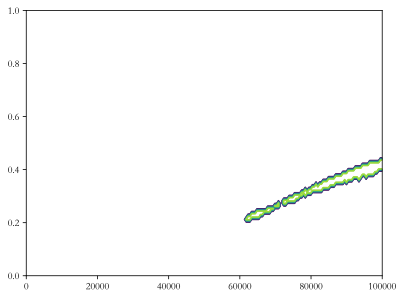

In [92]:
plt.contour(X,Y,Z>228.3)

Text(0.5, 1.0, '各个阻尼系数下的平均功率')

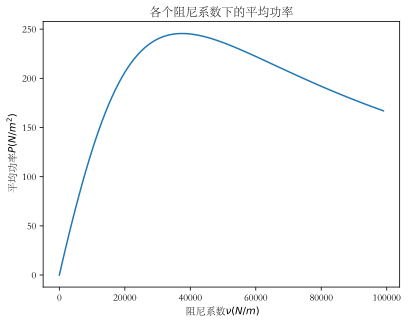

In [19]:

plt.rcParams['font.sans-serif'] = ['STSong']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(aa,bb)
plt.xlabel(r' 阻尼系数$\nu(N/m)$')
plt.ylabel(r' 平均功率$P(N/m^2)$')
plt.title('各个阻尼系数下的平均功率')

In [17]:
print(-errequ1(49500))

49500 -> 24.404169928450937
24.404169928450937


In [20]:
res=opt.minimize(errequ1,[10000],method='Nelder-Mead',bounds=[(0,100000)])

print(res)
print(-errequ1(res.x[0]))

C:\Users\Administrator\AppData\Local\Temp\ipykernel_32740\1408025642.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([fxv,fxf,fdxv,fdxf])


[10000.] -> 126.8174102390425
[10500.] -> 131.99601450918868
[11000.] -> 137.04764131437292
[11500.] -> 141.97547588761904
[12500.] -> 151.44174440632443
[13500.] -> 160.38926569686242
[15500.] -> 176.7325510694169
[17500.] -> 191.01468457444088
[21500.] -> 213.69987346174975
[25500.] -> 229.32559355152546
[33500.] -> 244.09825661869877
[41500.] -> 244.38351855354657
[57500.] -> 225.967930813214
[33500.] -> 244.09825661869877
[49500.] -> 236.9524260043462
[37500.] -> 245.5634121682676
[33500.] -> 244.09825661869877
[39500.] -> 245.25166000124474
[35500.] -> 245.21502566223597
[38500.] -> 245.48185799550706
[36500.] -> 245.47804268284392
[38000.] -> 245.54124536195891
[37000.] -> 245.54224205390423
[37250.] -> 245.55813739248637
[37750.] -> 245.5562632291675
[37375.] -> 245.56206013828208
[37625.] -> 245.56237880756743
[37562.5] -> 245.56334777336662
[37437.5] -> 245.56296377463923
[37531.25] -> 245.56340116403453
[37468.75] -> 245.56323538167754
[37515.625] -> 245.56345031983778
[37531

In [44]:
nu1=res.x[0]

In [69]:
errequ2(49875,0),errequ1(49875.06)

49875 && 0 -> 24.227968340157528
49875.06 -> 24.405344440313442


(-24.227968340157528, -24.405344440313442)

In [64]:

res2=opt.minimize(lambda x:errequ2(x[0],x[1]),[40000,0.2],method='Nelder-Mead',bounds=[(0,100000),(0,1)],tol=0.0001)

print(res2)
print(-errequ2(res2.x[0],res2.x[1]))

40000.0 && 0.2 -> 212.93983443717346
42000.0 && 0.2 -> 216.17389688003266
40000.0 && 0.21000000000000002 -> 211.29941700557362
42000.0 && 0.19 -> 217.60440907431558
43000.0 && 0.18000000000000005 -> 220.18964004996693
45000.0 && 0.18000000000000005 -> 222.47148839936293
47500.0 && 0.17000000000000004 -> 225.53420683746123
48500.0 && 0.15000000000000008 -> 227.22597065262357
51750.0 && 0.1250000000000001 -> 228.05549258473363
56250.0 && 0.1150000000000001 -> 226.37976924663133
60500.0 && 0.07000000000000017 -> 218.15849887137352
50750.0 && 0.14500000000000007 -> 227.8974124114544
46250.0 && 0.15500000000000008 -> 225.7463566487482
53750.0 && 0.1250000000000001 -> 227.67695679724994
48750.0 && 0.14500000000000007 -> 227.50179936076597
52500.0 && 0.13000000000000012 -> 227.97596882891136
53500.0 && 0.11000000000000015 -> 227.16816481396498
51437.5 && 0.1362500000000001 -> 228.0978870431126
50687.5 && 0.1312500000000001 -> 228.21368386253283
49781.25 && 0.13187500000000008 -> 228.088208206

In [122]:
nun0=[40000,0.8]
ptstore=np.array(nun0)
def drawpt(x):
    global ptstore
    plt.scatter(x[0],x[1],color='b')
    plt.plot([x[0],ptstore[0]],[x[1],ptstore[1]],color='b')
    ptstore=x

40000.0 && 0.8 -> 90.52725758506452
42000.0 && 0.8 -> 94.5142370367762
40000.0 && 0.8400000000000001 -> 84.06757607904053
42000.0 && 0.76 -> 101.55814211712922
43000.0 && 0.7200000000000002 -> 111.17039095078276
45000.0 && 0.7200000000000002 -> 115.40733855881425
47500.0 && 0.6800000000000002 -> 128.8525910210297
48500.0 && 0.6000000000000003 -> 148.29983443636561
51750.0 && 0.5000000000000004 -> 177.29279478434793
56250.0 && 0.4600000000000004 -> 193.76244710762046
62875.0 && 0.3300000000000005 -> 222.07151197954929
67125.0 && 0.1500000000000008 -> 223.2321285419305
76937.5 && 0.0 -> 180.06478296860084
78250.0 && 0.0 -> 178.21594006893577
71625.0 && 0.11000000000000076 -> 214.01861268186084
58375.0 && 0.37000000000000055 -> 212.7019797094016
68312.5 && 0.1750000000000007 -> 225.0151252244863
72562.5 && 0.0 -> 186.36168988467912
65296.875 && 0.24625000000000064 -> 228.25466870633608
66484.375 && 0.27125000000000055 -> 227.8360052558549
63468.75 && 0.34250000000000047 -> 221.28728012513

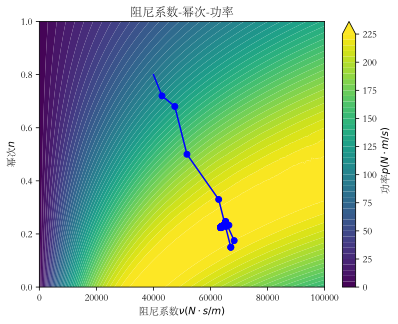

In [123]:
cs=plt.contourf(X,Y,Z,50,extend='max')

plt.title('阻尼系数-幂次-功率')
plt.xlabel(r'阻尼系数$\nu(N\cdot s/m)$')
plt.ylabel(r'幂次$n$')
plt.colorbar(cs,label=r'功率$p(N\cdot m/s)$')

res2=opt.minimize(lambda x:errequ2(x[0],x[1]),nun0,method='Nelder-Mead',bounds=[(0,100000),(0,1)],tol=0.0001,callback=drawpt)

print(res2)
print(-errequ2(res2.x[0],res2.x[1]))

In [30]:
res2=opt.differential_evolution(lambda x:errequ2(np.abs(x[0]),x[1]),x0=[40000,0.2],bounds=[(0,100000),(0,1)],tol=0.001)

40000.0 && 0.2 -> 230.08892877777294
86129.18624946289 && 0.7041697910166099 -> 202.76322807666057
39038.84695703528 && 0.44928833038171667 -> 175.99335763216183
67675.5523133392 && 0.33483530242763304 -> 242.0593388577551
78053.43192966368 && 0.8486362875823701 -> 161.88062667215303
70857.35484000025 && 0.2921701794606536 -> 245.373896616741
688.2140005377441 && 0.87311783221012 -> 2.14933047851215
22867.682183675715 && 0.5061614651181193 -> 108.60516271919579
6908.514477922792 && 0.4033832622919357 -> 44.43359220689901
27216.358907973598 && 0.6122699538649159 -> 105.35001141330018
30340.078209803865 && 0.49173457636260026 -> 139.13021416880676
64411.060142209644 && 0.17037967207860422 -> 243.59551615269285
92011.51051565955 && 0.9613772762244028 -> 154.9745970365489
89596.18911860083 && 0.14898757022911302 -> 221.46587971916975
94610.1690902164 && 0.7625965562587569 -> 199.9235315184316
5360.046284243537 && 0.8305825541643042 -> 16.110420383705073
56042.614677614656 && 0.221441355693

In [59]:
nu1=res2.x[0]
n1=res2.x[1]

# 稳定性分析

In [142]:
def equt(t,x,nu,n,f,w,k,):
    xv=x[0]
    xf=x[1]
    dxv=x[2]
    dxf=x[3]
    fxv=dxv
    fxf=dxf
    fdxv=(-k*xv+k*xf-nu*(dxv-dxf)*(np.abs(dxv-dxf))**n)/mv
    m=mf+ma
    fdxf=(-k*xf+k*xv+nu*(dxv-dxf)*(np.abs(dxv-dxf))**n-mu*dxf+f*np.cos(w*t)-r*xf)/m
    return np.array([fxv,fxf,fdxv,fdxf])

In [157]:
x0=np.array([xres2[i][-1] for i in range(4)])
nnu,nn=res2.x[0],res2.x[1]
nnu,nn,x0

(63707.41352811264,
 0.22577843340845627,
 array([-0.49625304, -0.42404531, -0.19212595, -0.13948351]))

In [158]:
def calcPow(nu,nuM,f,w,k):
    print(x0)
    sol=intode.solve_ivp(lambda t,x:equt(t,x,nu,nuM,f,w,k),(te[0],te[-1]),x0,method=solvemethod,t_eval=te)
    xres=sol.y
    tres=sol.t
    p=calcP(nu,nuM,xres2)
    index=xres[1]
    return p,max(index)
    

In [160]:
ff=range(0,10000,100)
mm=[0 for i in ff]
pp=mm[:]
for i in range(len(ff)):
    temp=calcPow(nnu,nn,ff[i],w,k)
    mm[i]=temp[1]
    pp[i]=temp[0]

[-0.49625304 -0.42404531 -0.19212595 -0.13948351]
[-0.49625304 -0.42404531 -0.19212595 -0.13948351]
[-0.49625304 -0.42404531 -0.19212595 -0.13948351]
[-0.49625304 -0.42404531 -0.19212595 -0.13948351]
[-0.49625304 -0.42404531 -0.19212595 -0.13948351]
[-0.49625304 -0.42404531 -0.19212595 -0.13948351]
[-0.49625304 -0.42404531 -0.19212595 -0.13948351]
[-0.49625304 -0.42404531 -0.19212595 -0.13948351]
[-0.49625304 -0.42404531 -0.19212595 -0.13948351]
[-0.49625304 -0.42404531 -0.19212595 -0.13948351]
[-0.49625304 -0.42404531 -0.19212595 -0.13948351]
[-0.49625304 -0.42404531 -0.19212595 -0.13948351]
[-0.49625304 -0.42404531 -0.19212595 -0.13948351]
[-0.49625304 -0.42404531 -0.19212595 -0.13948351]
[-0.49625304 -0.42404531 -0.19212595 -0.13948351]
[-0.49625304 -0.42404531 -0.19212595 -0.13948351]
[-0.49625304 -0.42404531 -0.19212595 -0.13948351]
[-0.49625304 -0.42404531 -0.19212595 -0.13948351]
[-0.49625304 -0.42404531 -0.19212595 -0.13948351]
[-0.49625304 -0.42404531 -0.19212595 -0.13948351]


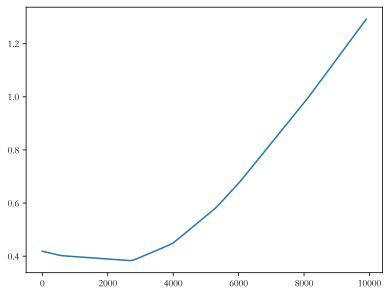

In [162]:

plt.plot(ff,mm)
# plt.ylim(0.5,1.2)
# plt.xlim(-100,2600)
# plt.plot(range(-1000,9000,1000),[1 for i in range(-1000,9000,1000)],color='r')
# plt.title('激励力-浮子振幅指数')
# plt.xlabel(r'激励力($N$)')
# plt.ylabel('浮子振幅指数(m)')
# xxx=1939.24
# plt.vlines([xxx],[0],[1],linestyles='dashed',colors=['grey'])
# plt.text(xxx+50,0.52,r'y='+str(xxx))